# Import the necessary libraries

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Downloading the dataset required for training and classification

In [2]:
link = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [3]:
zip_data = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=link, extract=True)

68608000/68606236 [==============================] - 393s 6us/step


In [10]:
import os

### Loading the downloaded files

In [6]:
custom_base_dir = 'C:\\Users\\Lenovo\\.keras\\datasets\\cats_and_dogs_filtered'

In [8]:
zip_dir_base = os.path.dirname(zip_data)

In [9]:
zip_dir_base

'C:\\Users\\Lenovo\\.keras\\datasets'

In [10]:
base_dir = os.path.join(os.path.dirname(zip_data), 'cats_and_dogs_filtered')

In [11]:
base_dir

'C:\\Users\\Lenovo\\.keras\\datasets\\cats_and_dogs_filtered'

In [7]:
base_dir = custom_base_dir

In [11]:
train_dir = os.path.join(base_dir, 'train')

In [12]:
train_dir

'C:\\Users\\Lenovo\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [13]:
validation_dir = os.path.join(base_dir, 'validation')

In [14]:
validation_dir

'C:\\Users\\Lenovo\\.keras\\datasets\\cats_and_dogs_filtered\\validation'

### Split the data into training and validation for dogs and cats

In [15]:
## training directory
training_cat_dir = os.path.join(train_dir, 'cats')
training_dog_dir = os.path.join(train_dir, 'dogs')

In [16]:
## validation directory
validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [48]:
## checking the number of training files
training_files_count = len(os.listdir(training_cat_dir)) + len(os.listdir(training_dog_dir))
training_files_count

2000

In [49]:
## checking the number of validation files
validation_files_count = len(os.listdir(validation_cat_dir)) + len(os.listdir(validation_dog_dir))
validation_files_count

1000

## Data Preparation

1. Read images from the disk.
2. Decode contents from these images and convert it into a proper grid format and the RGB content.
3. Normalize the values in range (0-1).

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
training_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)

In [21]:
training_generator

In [22]:
training_images = training_generator.flow_from_directory(batch_size=100, directory=train_dir, 
                                                         target_size=(150, 150), class_mode='binary' )

Found 2000 images belonging to 2 classes.


In [23]:
validation_images = validation_generator.flow_from_directory(batch_size=100, directory=validation_dir, 
                                                            target_size=(150, 150), class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
sample,_ = next(training_images)

## Visualizing rescaled images

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

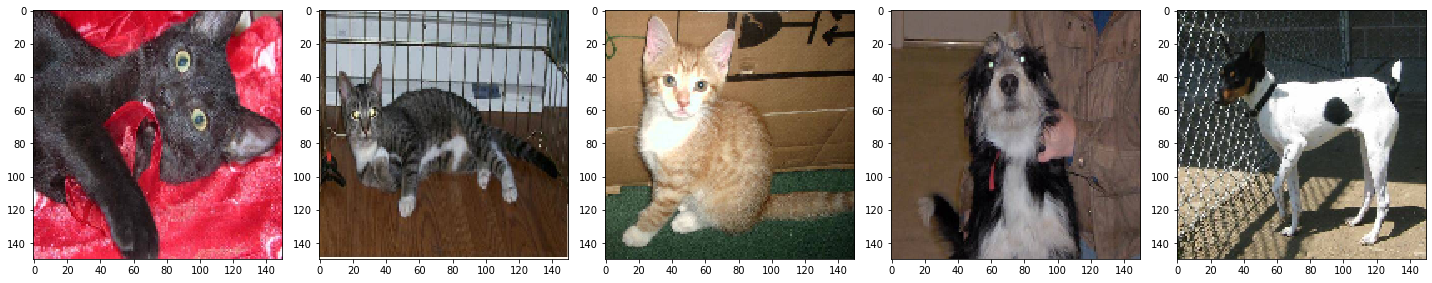

In [32]:
plotImages(sample[:5])

## Create the deep learning model

In [52]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [34]:
model = Sequential()

W0905 13:05:21.949161   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [35]:
model.add(Conv2D(32, (3,3), activation='relu', 
                 input_shape=(150, 150, 3)))

W0905 13:06:24.020819   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 13:06:24.058795   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [36]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0905 13:07:22.636019   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [37]:
model.add(Conv2D(64, (3,3), activation='relu'))

In [38]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(128, activation='relu'))

In [42]:
model.add(Dense(2, activation='softmax'))

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0905 13:10:22.112465   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 13:10:22.225397   308 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



## Visualizing the layers

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10616960  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total para

In [56]:
model.fit_generator(training_images,
                    steps_per_epoch=200, 
                    epochs=5, 
                    validation_data=validation_images,
                   validation_steps=100)

Epoch 1/5
100/100 [==============================] - 877s 9s/step - loss: 0.9011 - acc: 0.5884 - val_loss: 0.6221 - val_acc: 0.6460
Epoch 2/5
100/100 [==============================] - 890s 9s/step - loss: 0.3653 - acc: 0.8401 - val_loss: 0.7307 - val_acc: 0.6860
Epoch 3/5
100/100 [==============================] - 846s 8s/step - loss: 0.0965 - acc: 0.9711 - val_loss: 1.1225 - val_acc: 0.7050
Epoch 4/5
100/100 [==============================] - 808s 8s/step - loss: 0.0122 - acc: 0.9992 - val_loss: 1.4738 - val_acc: 0.7060
Epoch 5/5
100/100 [==============================] - 783s 8s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.6330 - val_acc: 0.7070
